<a href="https://colab.research.google.com/github/GerardoMunoz/ML_2025/blob/main/Probalities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probability in Classification
Probability plays a crucial role in classification tasks, helping to determine how likely a data point belongs to a particular class. In models like Naïve Bayes, probability is used to:

* Estimate the probability of words occurring in each category.

* Compute the posterior probability of a document belonging to a specific class.

* Predict the most probable class based on these probabilities.






## The 20 Newsgroups Dataset
The 20 Newsgroups dataset is a popular benchmark for text classification tasks. It consists of 20 different categories of newsgroup posts, covering topics such as sports, politics, religion, science, and technology. Each article is labeled with one of these categories, making it an excellent dataset for training and evaluating text classification models.

This dataset is widely used in natural language processing (NLP) and machine learning, particularly for:

* Document classification (e.g., determining the topic of a given text)

* Feature extraction techniques (e.g., TF-IDF, Bag of Words, word embeddings)

* Supervised learning experiments (e.g., Naïve Bayes, SVM, Neural Networks)

Next we will explore some aspects of this dataset

In [1]:
from sklearn.datasets import fetch_20newsgroups

# Load the full dataset
newsgroups = fetch_20newsgroups(subset='all')

# Print total number of news articles
print(f"Total number of news articles: {len(newsgroups.data)}")

Total number of news articles: 18846


In [2]:
type(newsgroups.data)

list

In [3]:
len(newsgroups.data)

18846

In [4]:
print(newsgroups.data[0])

From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!




In [5]:
print(newsgroups.data[1])

From: mblawson@midway.ecn.uoknor.edu (Matthew B Lawson)
Subject: Which high-performance VLB video card?
Summary: Seek recommendations for VLB video card
Nntp-Posting-Host: midway.ecn.uoknor.edu
Organization: Engineering Computer Network, University of Oklahoma, Norman, OK, USA
Keywords: orchid, stealth, vlb
Lines: 21

  My brother is in the market for a high-performance video card that supports
VESA local bus with 1-2MB RAM.  Does anyone have suggestions/ideas on:

  - Diamond Stealth Pro Local Bus

  - Orchid Farenheit 1280

  - ATI Graphics Ultra Pro

  - Any other high-performance VLB card


Please post or email.  Thank you!

  - Matt

-- 
    |  Matthew B. Lawson <------------> (mblawson@essex.ecn.uoknor.edu)  |   
  --+-- "Now I, Nebuchadnezzar, praise and exalt and glorify the King  --+-- 
    |   of heaven, because everything he does is right and all his ways  |   
    |   are just." - Nebuchadnezzar, king of Babylon, 562 B.C.           |   



In [6]:
type(newsgroups.target)

numpy.ndarray

In [7]:
newsgroups.target[0]


np.int64(10)

In [8]:
newsgroups.target[1]


np.int64(3)

In [9]:
# Load all categories
all_categories = newsgroups.target_names
print('type:',type(all_categories))
print('len:',len(all_categories))
print()

# Display categories
for i, category in enumerate(all_categories):
    print(f"{i+1}. {category}")


type: <class 'list'>
len: 20

1. alt.atheism
2. comp.graphics
3. comp.os.ms-windows.misc
4. comp.sys.ibm.pc.hardware
5. comp.sys.mac.hardware
6. comp.windows.x
7. misc.forsale
8. rec.autos
9. rec.motorcycles
10. rec.sport.baseball
11. rec.sport.hockey
12. sci.crypt
13. sci.electronics
14. sci.med
15. sci.space
16. soc.religion.christian
17. talk.politics.guns
18. talk.politics.mideast
19. talk.politics.misc
20. talk.religion.misc


In [10]:
from collections import Counter

target_counts = Counter(newsgroups.target)

target_counts


Counter({np.int64(10): 999,
         np.int64(3): 982,
         np.int64(17): 940,
         np.int64(4): 963,
         np.int64(12): 984,
         np.int64(19): 628,
         np.int64(11): 991,
         np.int64(13): 990,
         np.int64(0): 799,
         np.int64(8): 996,
         np.int64(7): 990,
         np.int64(5): 988,
         np.int64(1): 973,
         np.int64(14): 987,
         np.int64(16): 910,
         np.int64(6): 975,
         np.int64(9): 994,
         np.int64(18): 775,
         np.int64(2): 985,
         np.int64(15): 997})

In [11]:
# Calculate the probability of each class
total_articles = len(newsgroups.target)
class_probabilities = {
    class_label: count / total_articles
    for class_label, count in target_counts.items()
}

# Print the probabilities
for class_label, probability in class_probabilities.items():
  print(f"Class {class_label}: {probability:.4f}")


Class 10: 0.0530
Class 3: 0.0521
Class 17: 0.0499
Class 4: 0.0511
Class 12: 0.0522
Class 19: 0.0333
Class 11: 0.0526
Class 13: 0.0525
Class 0: 0.0424
Class 8: 0.0528
Class 7: 0.0525
Class 5: 0.0524
Class 1: 0.0516
Class 14: 0.0524
Class 16: 0.0483
Class 6: 0.0517
Class 9: 0.0527
Class 18: 0.0411
Class 2: 0.0523
Class 15: 0.0529


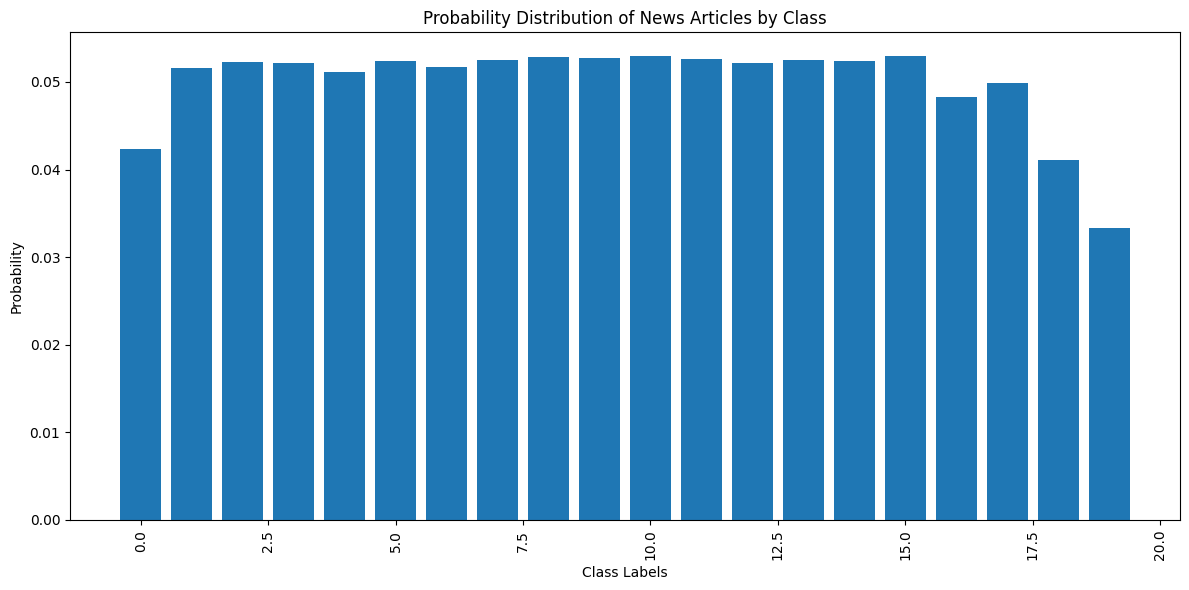

In [12]:

import matplotlib.pyplot as plt

# Assuming you have class_probabilities defined as in your previous code

# Extract class labels and probabilities
class_labels = list(class_probabilities.keys())
probabilities = list(class_probabilities.values())

# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
plt.bar(class_labels, probabilities)
plt.xlabel("Class Labels")
plt.ylabel("Probability")
plt.title("Probability Distribution of News Articles by Class")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


## The most probable class
The most probable class is **10. rec.sport.baseball**  with a probability of 5.3% (0.0530).




## The Importance of Balanced Data in Classification
In machine learning, balanced data is crucial for ensuring that models make fair and accurate predictions. Looking at the given probability distribution, we notice that the most probable class (Class 10) has a 5.3% probability, while many other classes have very similar probabilities (around 5.2%).

### What Does This Tell Us?
1. Minimal Probability Differences
   * The small gaps between class probabilities suggest that the model may be struggling to differentiate between them.
   * This can be a sign that the dataset is imbalanced, meaning some classes have far fewer samples than others.

2. Risk of Bias
  *  If some classes are underrepresented, the model may not learn their patterns well.
  *  As a result, it might misclassify minority classes or always favor majority classes.

3. Accuracy vs. Class Distribution
  *  Even if a model achieves high accuracy, it might not be truly effective.
  *  Example: If one class appears in 90% of the dataset, a model predicting that class all the time would still be 90% accurate—but completely useless for the other classes!

### How to Address Class Imbalance?
1. Resampling Techniques
  *  Oversampling: Increase the number of samples in the minority classes.
  *  Undersampling: Reduce the number of samples in the majority classes.
2. Using Class Weights
  *  Some algorithms (like logistic regression and decision trees) allow assigning higher weight to minority classes, forcing the model to pay more attention to them.
3. Anomaly Detection Methods
  * If a class is extremely rare, it may be better to treat it as an anomaly detection problem rather than a typical classification task.



#

In [13]:
# from sklearn.datasets import fetch_20newsgroups
# from sklearn.preprocessing import LabelBinarizer
# from collections import Counter
# import numpy as np

# # Load the full dataset
# newsgroups = fetch_20newsgroups(subset='all')

# # Tokenize and build vocabulary
# all_words = []
# for text in newsgroups.data:
#     all_words.extend(text.split())  # Simple whitespace-based tokenization

# # Create a vocabulary of unique words
# vocab = list(set(all_words))
# vocab_size = len(vocab)

# # Create a mapping from words to indices
# word_to_index = {word: i for i, word in enumerate(vocab)}

# #Python 3.7 and later, dictionaries maintain the insertion order.

# # One-hot encode each word
# def one_hot_encode(word, vocab_size):
#     vec = np.zeros(vocab_size)
#     if word in word_to_index:
#         vec[word_to_index[word]] = 1
#     return vec

# # Example: Print one-hot encoding of some words
# sample_words = ["computer", "science", "email"]
# for word in sample_words:
#     print(f"{word}: {one_hot_encode(word, vocab_size)}")


In [14]:
#len(word_to_index)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

def bag_of_words(news_data):
    """Converts a list of news articles into a Bag of Words representation."""
    vectorizer = CountVectorizer()
    bow_matrix = vectorizer.fit_transform(news_data)  # Sparse matrix
    vocab = vectorizer.get_feature_names_out()  # Get vocabulary words
    return bow_matrix, vocab

# Example usage:
#newsgroups = fetch_20newsgroups(subset='all')
bow_matrix, vocab = bag_of_words(newsgroups.data)

# Print the shape of the matrix
print(f"BoW Matrix Shape: {bow_matrix.shape}")  # (num_articles, vocab_size)

# Get the most frequent words
word_counts = bow_matrix.sum(axis=0)  # Sum occurrences per word
sorted_word_indices = word_counts.argsort().tolist()[0][-10:]  # Top 10 words

# Print the most common words
most_common_words = [vocab[i] for i in sorted_word_indices]
print("Most common words:", most_common_words)


BoW Matrix Shape: (18846, 173762)
Most common words: ['for', 'it', 'ax', 'that', 'is', 'in', 'and', 'of', 'to', 'the']


---

## Conditional Probability

Conditional probability is the probability of an event **A** occurring, given that another event **B** has already occurred. It is denoted as:

$$
P(A | B) = \frac{P(A \cap B)}{P(B)}
$$

where:
- $ P(A | B) $ is the probability of **A** given **B**  
- $ P(A \cap B) $ is the probability of **A and B** happening together  
- $ P(B) $ is the probability of **B** occurring  





###  Example: Dog Breeds & Colors

#### **Problem Statement**
Suppose we have this dataset of **10 dogs**, each with a **breed** and a **color**.


| Dog | Breed      | Color  |
|-----|-----------|--------|
| 1   | Labrador  | Black  |
| 2   | Beagle    | Brown  |
| 3   | Poodle    | White  |
| 4   | Labrador  | Brown  |
| 5   | Beagle    | Brown  |
| 6   | Beagle    | White  |
| 7   | Beagle    | White  |
| 8   | Labrador  | Black  |
| 9   | Poodle    | Brown  |
| 10  | Beagle    | White  |



We want to calculate:


$$
P(Brown)=\frac{4}{10}=\frac{2}{5}
$$

$$
P(Beagle)=\frac{5}{10}=\frac{1}{2}
$$

$$
P(Beagle \cap Brown)=\frac{2}{10}=\frac{1}{5}
$$


Let's calculate the probability that a dog is a **Beagle**, given that it is **Brown**.

$$
P(\text{Beagle} | \text{Brown})=\frac{P(Beagle \cap Brown)}{P(Brown)}=\frac{\frac{2}{10}}{\frac{4}{10}}=\frac{1}{2}
$$


Also, calculate the probability that a dog is a **Brown**, given that it is **Beagle**.

$$
P(\text{Brown} | \text{Beagle})=\frac{P(Beagle \cap Brown)}{P(Beagle)}=\frac{\frac{2}{10}}{\frac{5}{10}}=\frac{2}{5}
$$

---

Now, suppose someone tells you they are going to give you a **Cream** dog, but they do not say the breed.  
You want to know the probability that the dog is a **Golden Retriever**, denoted as $ P(\text{Golden Retriever} | \text{Cream}) $.  

And you know the proportions of the dogs in the city:  
- The proportion of **Golden Retrievers**: $ P(\text{Golden Retriever}) $  
- The proportion of **Cream-colored dogs**: $ P(\text{Cream}) $
- The proportion of **Golden Retrievers that are Cream**: $ P(\text{Cream} | \text{Golden Retriever}) $  

This can be computed using **Bayes' Theorem**:

$$
P(\text{Golden Retriever} | \text{Cream}) = \frac{P(\text{Cream} | \text{Golden Retriever}) \cdot P(\text{Golden Retriever})}{P(\text{Cream})}
$$


---
##  Bayes' Theorem

Bayes' Theorem is derived from the definition of conditional probability as follows:

$$
P(A | B) = \frac{P(A \cap B)}{P(B)}
$$

and

$$
P(B | A) = \frac{P(A \cap B)}{P(A)}
$$


So

$$
P(A | B)P(B) = P(A \cap B) = P(B | A) P(A)
$$

Or

$$
P(A | B) =\frac{P(B | A) P(A)}{P(B)}
$$

---



### Classic Applications of Bayes' Theorem

Bayes' Theorem is widely used in classification tasks, especially with **Naïve Bayes classifiers**. Here are **three classic applications**:



#### 1. **Spam Detection**  
Naïve Bayes is widely used to classify emails as **spam or not spam** based on word occurrences.  

- **Example:** If an email contains words like *“free,” “lottery,” “win”*, the probability of being spam increases.  
- **Formula:**  
  $$
  P(\text{Spam} | \text{Words}) = \frac{P(\text{Words} | \text{Spam}) \cdot P(\text{Spam})}{P(\text{Words})}
  $$
- **Why Bayes?** It efficiently estimates the probability of spam even with limited data.  



#### 2. **Medical Diagnosis**  
Doctors use Bayes' Theorem to assess the probability of a disease given a positive test result.  

- **Example:** If a patient tests positive for a rare disease, Bayes helps compute the actual likelihood of having it, considering false positives.  
- **Formula:**  
  $$
  P(\text{Disease} | \text{Test Positive}) = \frac{P(\text{Test Positive} | \text{Disease}) \cdot P(\text{Disease})}{P(\text{Test Positive})}
  $$
- **Why Bayes?** It accounts for **false positives** and the **base rate** of diseases in the population.  



#### 3. **Document Classification**  
Bayes is used to categorize text documents (news, reviews, etc.).  

- **Example:** Classifying news articles into topics like *sports, politics, technology, or entertainment* based on word frequency.  
- **Why Bayes?** It’s fast and effective for text data with many features (words).  

----

### The Naïve in Naïve Bayes

Naïve Bayes is considered "Naïve" because it makes a strong independence assumption between features. This means that it assumes all features in the dataset are conditionally independent given the class label.

#### Why is this assumption "Naïve"?
In reality, many features are not truly independent. For example:

* In text classification, words in a sentence are often correlated (e.g., "New" and "York" frequently appear together).

* In medical diagnosis, symptoms may be related (e.g., fever and sore throat often occur together).

#### Example of the Naïve Assumption Failing
Imagine you're classifying emails as Spam or Not Spam based on words in the email.

* Naïve Bayes assumes that the presence of the words "free" and "money" are independent.

* But in reality, if "free" appears, "money" is more likely to appear too, especially in spam emails.

Despite this assumption, Naïve Bayes works well in practice because it still captures useful patterns in the data.

# **Bayes' Theorem Example with 20 Newsgroups**

The **20 Newsgroups dataset** is a collection of documents categorized into **20 different topics**. A common application of **Naïve Bayes** is to classify a given document into one of these topics based on word frequencies.

## **Problem Statement**
Suppose we receive a new article, and we want to determine whether it belongs to the **rec.sport.baseball** category.

We can use **Bayes' Theorem** to compute:

$$
P(\text{Baseball} | \text{Words in Document})
$$

which is the probability that the document belongs to the "rec.sport.baseball" category given the words it contains.

---

## **Applying Bayes' Theorem**
Bayes' Theorem states:

$$
P(\text{Baseball} | \text{Words}) = \frac{P(\text{Words} | \text{Baseball}) \cdot P(\text{Baseball})}{P(\text{Words})}
$$

Where:
- **$ P(\text{Baseball} | \text{Words}) $**: Probability that the document belongs to "rec.sport.baseball" given its words.
- **$ P(\text{Words} | \text{Baseball}) $**: Probability of these words appearing in a baseball article.
- **$ P(\text{Baseball}) $**: Prior probability of an article being about baseball.
- **$ P(\text{Words}) $**: Probability of seeing this combination of words in any document.

---

## **Estimating the Probabilities**
Using the training data from 20 Newsgroups, we can estimate:

1. **Prior Probability**  
   $$
   P(\text{Baseball}) = \frac{\text{Number of baseball articles}}{\text{Total articles}}
   $$

2. **Likelihood of Words Given Baseball**  
   If our document contains words like `"home run"`, `"pitcher"`, and `"bat"`, we compute:

   $$
   P(\text{"home run"} | \text{Baseball}) = \frac{\text{Count of "home run" in Baseball}}{\text{Total words in Baseball}}
   $$

   Similarly, for all words in the document:

   $$
   P(\text{Words} | \text{Baseball}) = P(\text{"home run"} | \text{Baseball}) \times P(\text{"pitcher"} | \text{Baseball}) \times P(\text{"bat"} | \text{Baseball}) \times ...
   $$

3. **Denominator $ P(\text{Words}) $**  
   This is a normalization factor and can be computed by summing over all classes:

   $$
   P(\text{Words}) = P(\text{Words} | \text{Baseball}) P(\text{Baseball}) + P(\text{Words} | \text{Other Categories}) P(\text{Other Categories})
   $$

---

## **Decision Rule**
Once we compute $ P(\text{Baseball} | \text{Words}) $ and similar probabilities for other categories, we **assign the document to the class with the highest probability**:

$$
\text{Predicted Category} = \arg\max_{C} P(C | \text{Words})
$$

---

## **Why Naïve Bayes Works Well**
- Even though **words are not truly independent**, Naïve Bayes **performs well** in text classification.
- It is **computationally efficient** and works well with **high-dimensional data** like text.

---

## **Implementation in Python**
You can apply **Naïve Bayes to 20 Newsgroups** in Python using `sklearn`:



In [1]:
# Import necessary libraries
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
import numpy as np

# Load the dataset with selected categories
categories = ['rec.sport.baseball', 'sci.space']  # We choose two categories for simplicity
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

# Build a pipeline with Naïve Bayes
text_clf = Pipeline([
    ('vect', CountVectorizer()),        # Convert text to count vectors
    ('tfidf', TfidfTransformer()),      # Compute TF-IDF
    ('clf', MultinomialNB()),           # Train Naïve Bayes classifier
])

# Train the model
text_clf.fit(newsgroups_train.data, newsgroups_train.target)

# Test on a new document
new_doc = ["The pitcher threw a perfect game with an amazing home run."]
predicted_category = text_clf.predict(new_doc)

# Output the predicted category
print(f"Predicted Category: {newsgroups_train.target_names[predicted_category[0]]}")

# Evaluate the model on the test set
predicted = text_clf.predict(newsgroups_test.data)
accuracy = np.mean(predicted == newsgroups_test.target)
print(f"Model Accuracy: {accuracy:.4f}")


Predicted Category: rec.sport.baseball
Model Accuracy: 0.9924


## To Do
* Find the word that best classifies the `rec.sport.baseball` category.
* Using the same method, find a word for each of the other categories.
* How can you determine the category of a new document if multiple words suggest different categories?
* Consult about 'Term Frequency-Inverse Document Frequency' and describe how they could be used for document classification.